<a href="https://colab.research.google.com/github/abdulilahalqasem/NLP-Twitter-Sentiment-Analysis/blob/main/Code/NLP_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **#1 Import Libraries**

In [1]:
#!pip install wordcloud

In [2]:
#Importing all the libraries needed.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import string
import nltk # Natural Language tool kit
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

## **#2 Load Dataset**

In [3]:
#Load the dataset.
dataset_url = 'https://raw.githubusercontent.com/abdulilahalqasem/NLP-Twitter-Sentiment-Analysis/main/Dataset/twitter.csv'
tweets_df = pd.read_csv(dataset_url)

In [4]:
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


#3 Exploratory Data Analysis (EDA)

In [5]:
#Shows information about the dataset, such as the number of non-null entries, data types, and memory usage.
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
#Provides statistical summary information about numeric columns in the dataset.
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [7]:
#Displays the 'tweet' column from the DataFrame.
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [8]:
#Drops the 'id' column from the DataFrame.
tweets_df = tweets_df.drop(['id'], axis=1)

In [9]:
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


<Axes: >

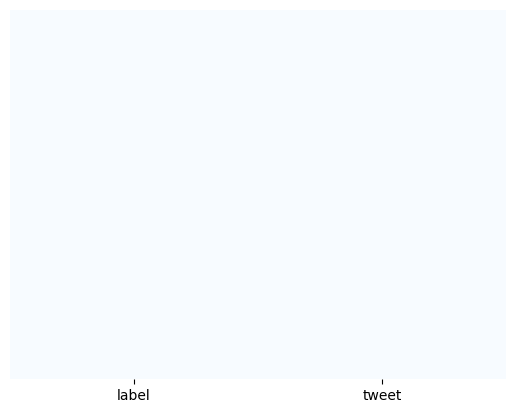

In [10]:
#Plots heatmap for the null in the DataFrame.
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap= 'Blues')

array([[<Axes: title={'center': 'label'}>]], dtype=object)

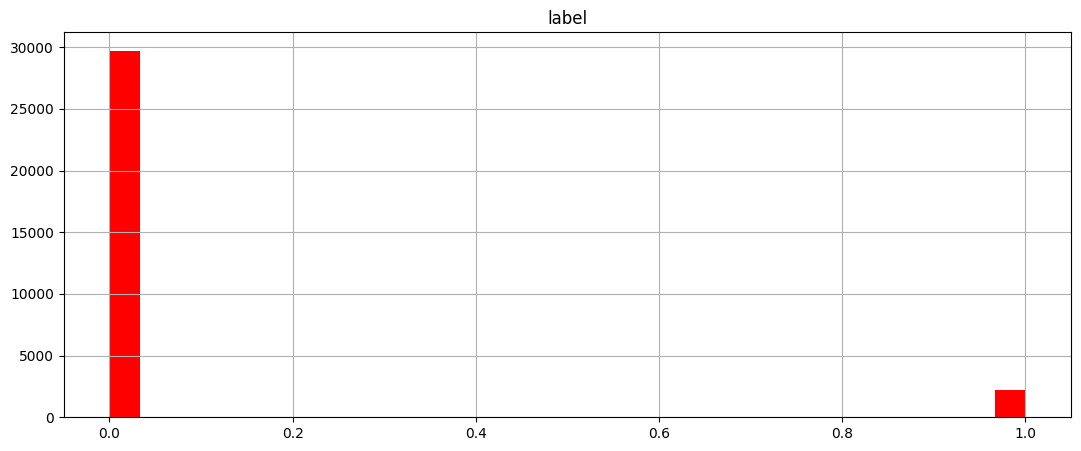

In [11]:
#Plots histograms for the DataFrame.
tweets_df.hist(bins= 30, figsize = (13,5), color = 'r')

<Axes: ylabel='count'>

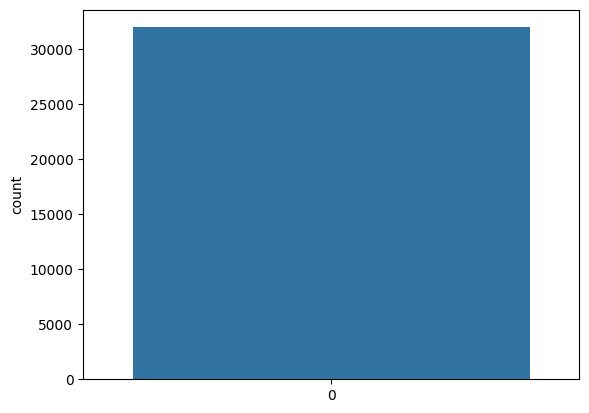

In [12]:
#Plots Countplot for the label column of the DataFrame.
sns.countplot(tweets_df['label'], label = "Count")

In [13]:
#Creating new coulmn 'length' for tweets length.
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [14]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


In [15]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [16]:
# Let's see the shortest message
tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0]

'i love you '

In [17]:
# Let's view the message with mean length
tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

<Axes: ylabel='Frequency'>

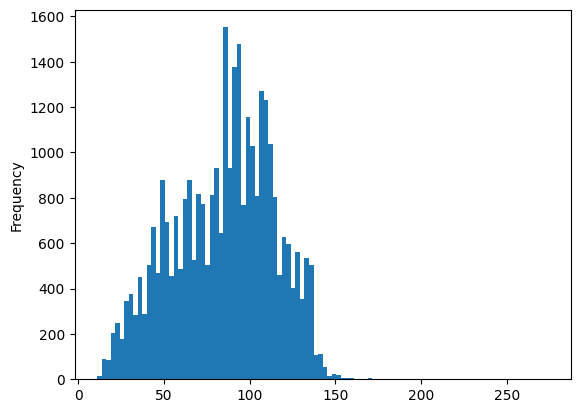

In [18]:
# Plot the histogram of the length column
tweets_df['length'].plot(bins=100, kind='hist')

In [19]:
#Creating postive data frame to use WordCloud.
positive = tweets_df[tweets_df['label']==0]
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [20]:
#Creating negative data frame to use WordCloud.
negative = tweets_df[tweets_df['label']==1]
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [21]:
#Combining all the tweets in one string.
sentences = tweets_df['tweet'].tolist()
len(sentences)
sentences_as_one_string =" ".join(sentences)

In [22]:
#sentences_as_one_string

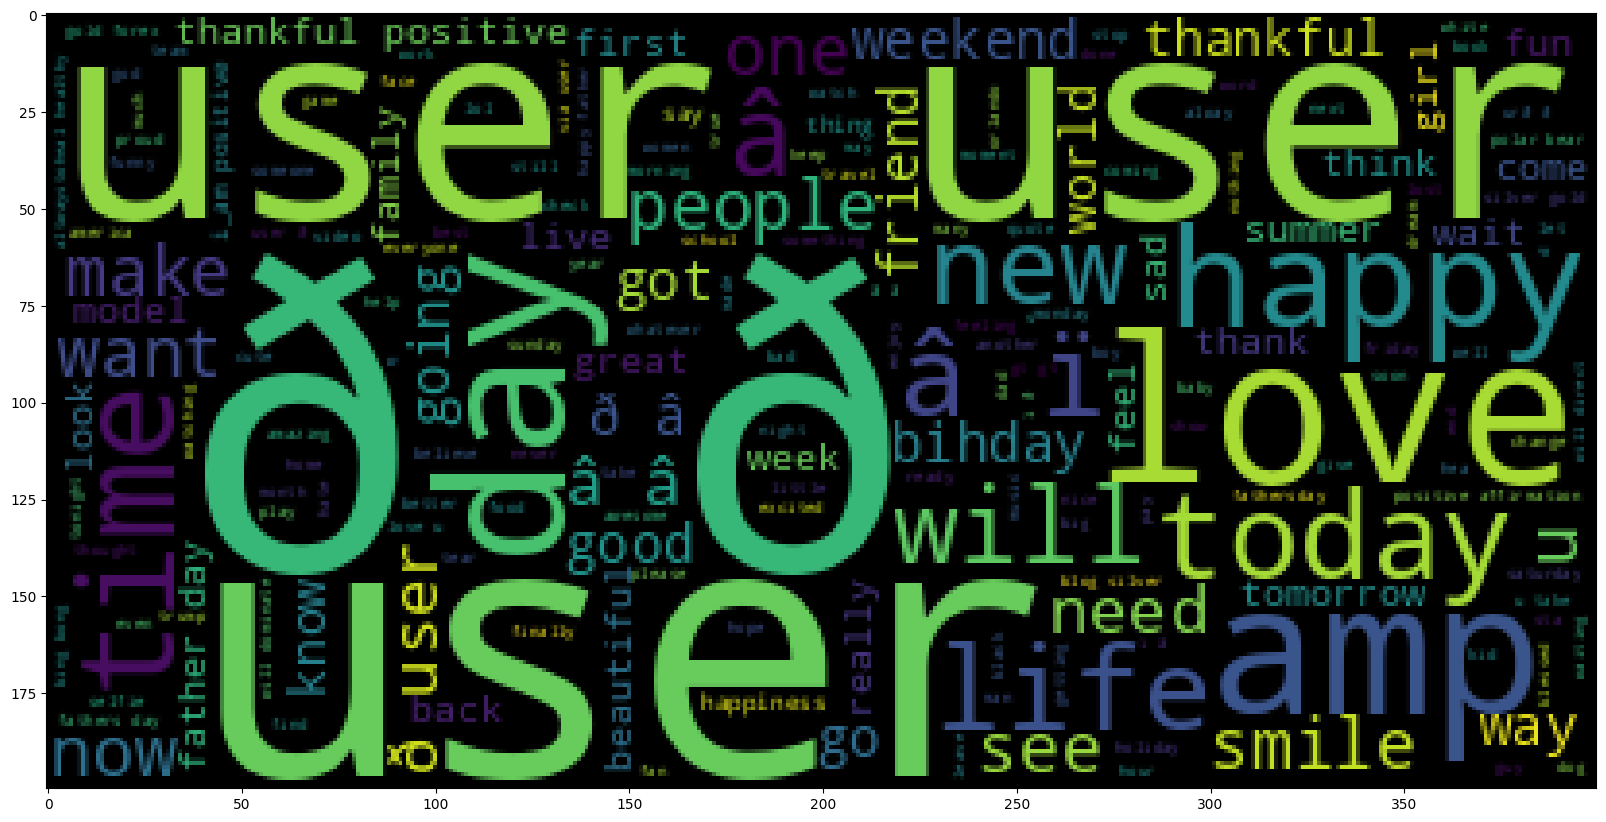

In [23]:
#Plot the WorldCloud for all the tweets.
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

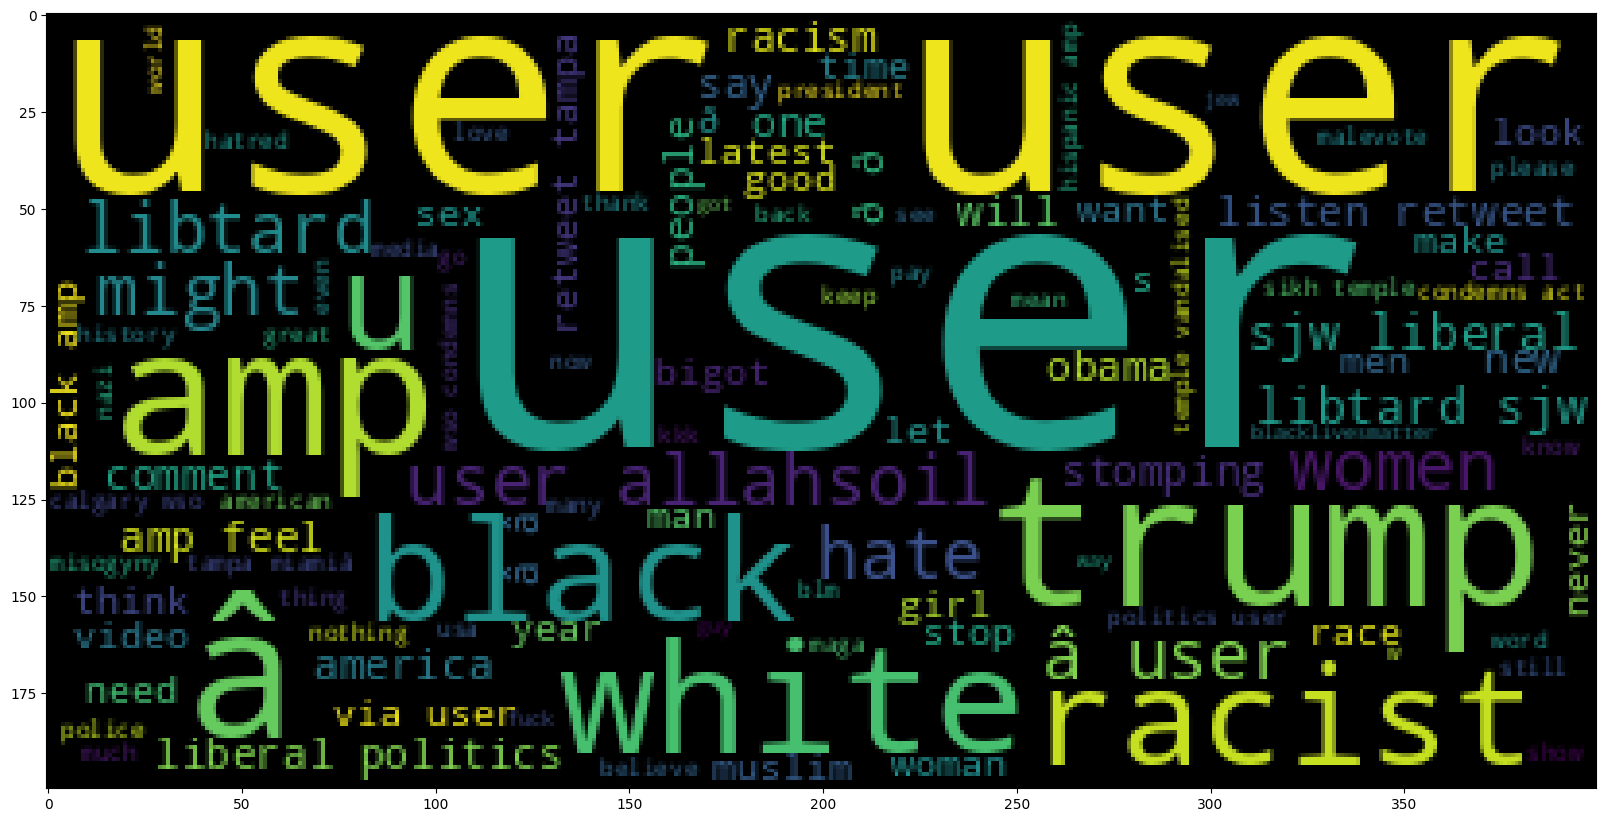

In [24]:
#Plot the WorldCloud for all the negative tweets.
negative_list = negative['tweet'].tolist()
negative_list
negative_sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

In [25]:
#Importing and calling all the Punctuations.
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
#Importing and calling all the stop words in english.
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
# define a pipeline to clean up all the messages.
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords.

def message_cleaning(message):
    message_punc_removed = [char for char in message if char not in string.punctuation]
    message_punc_removed_join = ''.join(message_punc_removed)
    message_punc_removed_join_clean = [word for word in message_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return message_punc_removed_join_clean

In [28]:
#Testing the newly added function

#tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

#print(tweets_df_clean[5]) # show the cleaned up version

#print(tweets_df['tweet'][5]) # show the original version

In [29]:
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [30]:
#Prints a numeric representation of the text data in the tweets_countvectorizer.
print(tweets_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
#Checking the shape.
tweets_countvectorizer.shape

(31962, 47386)

## **#4 Model**

In [32]:
#Creating feature matrix X and target vector y from the transformed data.
X = pd.DataFrame(tweets_countvectorizer.toarray())
y = tweets_df['label']

In [33]:
X.shape

(31962, 47386)

In [34]:
y.shape

(31962,)

In [35]:
#train_test_split is used to split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
#A Multinomial Naive Bayes classifier is created and trained on the training data.
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<Axes: >

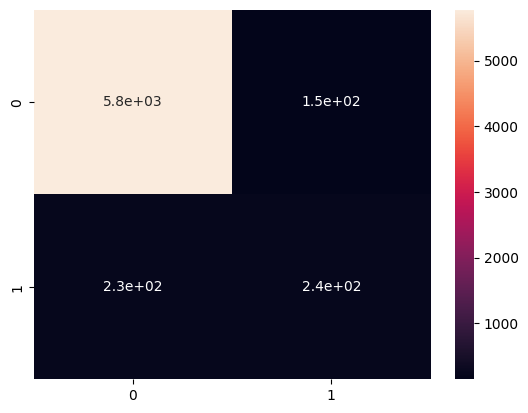

In [37]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [38]:
#A confusion matrix and classification report are generated to evaluate the model's performance.
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5924
           1       0.61      0.50      0.55       469

    accuracy                           0.94      6393
   macro avg       0.79      0.74      0.76      6393
weighted avg       0.94      0.94      0.94      6393

